In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

In [2]:
with open('cranium2.msg') as f:
    lines = f.readlines()
lines = str(lines)

In [3]:
i = 0
j = 0
k = 0
res = np.zeros([1000,100])
while k < len(lines):
    k = lines.find('LARGEST RESIDUAL FORCE')
    if k == -1:
        break
    if lines[:k].find('THE FORCE     EQUILIBRIUM EQUATIONS HAVE CONVERGED') > -1:
        i+= 1
        j = 0
    res[i,j] = float(lines[k+22:k+44])
    j+= 1
    lines = lines[k+44:]

<ipython-input-17-02c8d218c5f8>:4: RuntimeWarning: divide by zero encountered in log
  ax.plot(np.log(np.abs(res[i,:])), 'k', alpha=0.2)


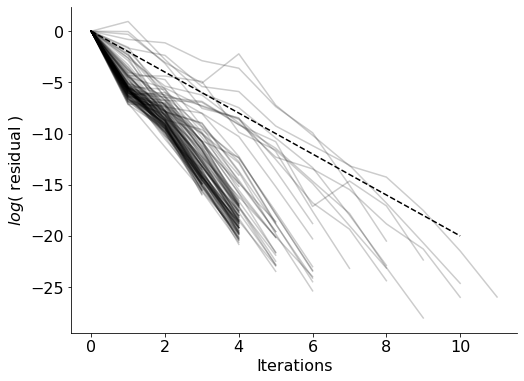

In [17]:
fig, ax = plt.subplots(figsize=[8,6])
for i in range(1000):
    res[i,:] = res[i,:]/res[i,0]
    ax.plot(np.log(np.abs(res[i,:])), 'k', alpha=0.2)
ax.plot([0,10],[0,-20], 'k--')
ax.set(xlabel='Iterations', ylabel='$log($ residual $)$'); 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig.savefig('convergence.svg')

In [21]:
i

118